# KOSPI_Stock

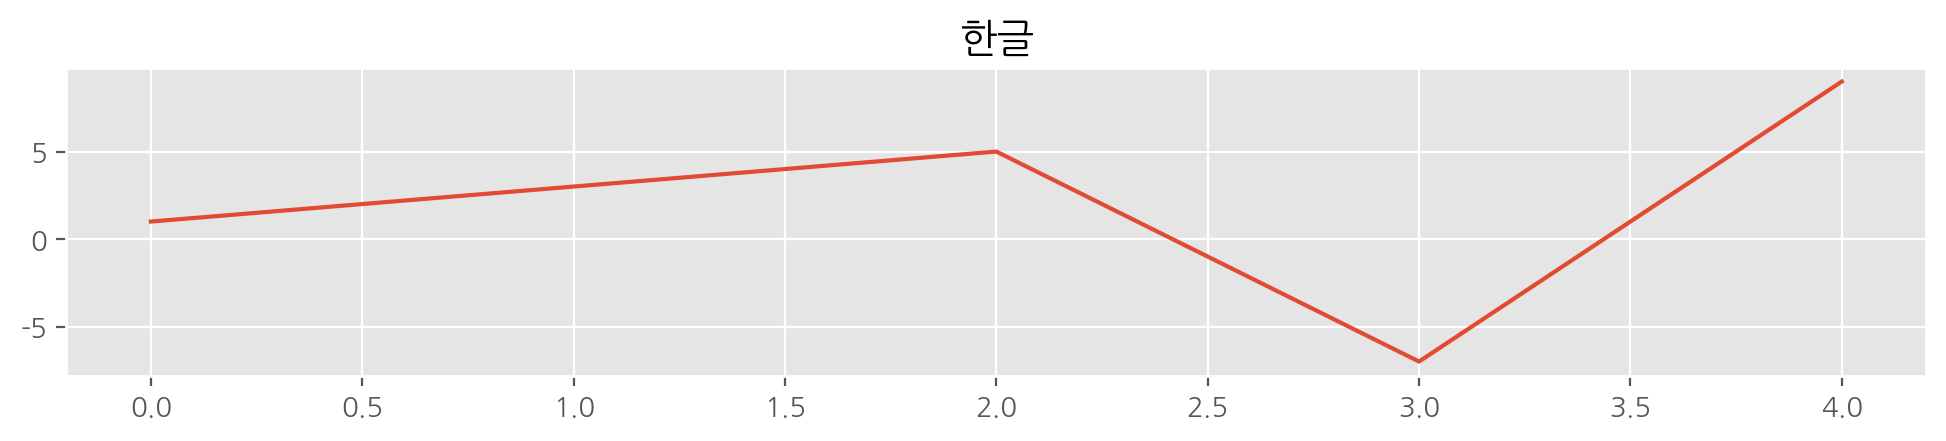

In [1]:
import pickle
import pandas as pd
pd.options.display.float_format = '{:.4f}'.format
import matplotlib.pyplot as plt
import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'
# 한글폰트 확인하기
plt.style.use("ggplot")
pd.Series([1,3,5,-7,9]).plot(title="한글",figsize=(12,2))
import FinanceDataReader as fdr
import warnings
warnings.filterwarnings('ignore')
from glob import glob
data_path = "../data/"

# KOSPI200 종목 리스트
- 분석 기간 동안의 종목

## Data Load : df_kospi200CorpList

In [2]:
df_kospi200CorpList = pd.read_csv(f"{data_path}KRX_KOSPI200_corpList.csv")
# 종목코드 자리수
df_kospi200CorpList["종목코드"] = df_kospi200CorpList["종목코드"].astype(str).apply(lambda x: x.zfill(6))
# 종목코드 오름차순 정렬
df_kospi200CorpList = df_kospi200CorpList.sort_values(by='종목코드' , ascending=True)
df_kospi200CorpList.head()

,종목코드,종목명
80,000030,우리은행
72,000050,경방
217,000060,메리츠화재
233,000070,삼양홀딩스
281,000080,하이트진로


## Data Load : df_krx

In [3]:
# krx 상장종목 모두 가져오기
df_krx = fdr.StockListing("KRX")
df_krx.head(2)

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,62600,2,-700,-1.1100,63500,63700,62500,5951887,374235601500,373708387630000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,517000,1,7000,1.3700,504000,517000,501000,163575,83413710000,120978000000000,234000000,STK


## df_kospi

In [4]:
# krx 전체 상장 종목중 KOSPI 상장 종목 추출하기
df_kospi = df_krx[df_krx['Market'] == 'KOSPI']
df_kospi.head(2)

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,62600,2,-700,-1.1100,63500,63700,62500,5951887,374235601500,373708387630000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,517000,1,7000,1.3700,504000,517000,501000,163575,83413710000,120978000000000,234000000,STK


## df_kospi200

In [5]:
# KOSPI 200 기업 추출하기
df_kospi200 = df_kospi[df_kospi['Code'].isin(df_kospi200CorpList["종목코드"].values)]
df_kospi200 = df_kospi200.sort_values(by='Code' , ascending=True)
df_kospi200.head(2)

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
652,000050,KR7000050005,경방,KOSPI,,10680,1,50,0.4700,10690,10700,10630,601,6416180,292795083600,27415270,STK
56,000060,KR7000060004,메리츠화재,KOSPI,,51600,0,0,0.0000,0,0,0,0,0,5732970012000,111104070,STK


In [6]:
# 코스피 200 기업 종목코드 추출
code_list = df_kospi200['Code'].values.tolist()
len(code_list)

309

In [7]:
# 코스피 200 기업 종목명 추출
name_list = df_kospi200['Name'].values.tolist()
len(name_list)

309

# KOSPI200 주가 데이터

## df_200

In [8]:
if glob("df_200.pkl") != ['df_200.pkl']:
    
    # 모든 종목의 주가를 저장
    df = []
    for i in range(len(code_list)):
        stock = fdr.DataReader(code_list[i],'2011')
        df.append(stock)

    # 데이터프레임에 종목코드 추가
    for i in range(len(code_list)):
        df[i]['Code'] = code_list[i]

    # 데이터프레임에 종목명 추가
    for i in range(len(name_list)):
        df[i]['Name'] = name_list[i]

    # 모든 데이터프레임을 병합
    df_200 = pd.concat(df)

    # 인덱스를 제거하고 컬럼에 추가
    df_200 = df_200.reset_index()

    # 병합한 데이터 영속화
    with open("df_200.pkl","wb") as f:
        pickle.dump(df_200, f)


with open("df_200.pkl","rb") as f:
    df_200 = pickle.load(f)

# 병합한 데이터를 미리보기
df_200.sample(5)

,Date,Open,High,Low,Close,Volume,Change,Code,Name
126688,2017-09-12,38250,38900,37750,38250,24905,0.0053,002620,제일파마홀딩스
464871,2020-08-24,41950,42150,41000,42050,137452,0.0012,017800,현대엘리베이
293137,2016-08-19,223500,225000,218500,218500,38929,-0.0267,006650,대한유화
817866,2022-07-20,11300,11450,11100,11200,237671,0.0045,294870,HDC현대산업개발
74440,2011-01-24,169500,172000,165000,167000,3796,0.0000,001130,대한제분


## df_200 전처리

In [9]:
# 파생변수 추가
df_200["연도-월"] = df_200["Date"].astype(str).str[:7]
df_200['연도'] = df_200['Date'].dt.year

# 컬럼명 변경하기
df_200.columns=['일자' , '시가' , '고가' , '저가' , '종가' , '거래량' , '등락률' , '종목코드' , '종목명' , '연도-월' , '연도']
# 컬럼 순서 변경하기
df_200 = df_200[['종목코드', '종목명', '일자', '연도', '연도-월', '시가' , '고가' , '저가' , '종가' , '거래량' , '등락률']]

df_200.head()

,종목코드,종목명,일자,연도,연도-월,시가,고가,저가,종가,거래량,등락률
0,000050,경방,2011-01-03,2011,2011-01,9160,9312,9046,9199,2639,0.0041
1,000050,경방,2011-01-04,2011,2011-01,9312,9312,9122,9275,1154,0.0083
2,000050,경방,2011-01-05,2011,2011-01,9350,9388,9046,9047,1026,-0.0246
3,000050,경방,2011-01-06,2011,2011-01,9160,9160,8894,8971,1082,-0.0084
4,000050,경방,2011-01-07,2011,2011-01,9008,9046,8856,8971,871,0.0000


## 영속화 : KRX_KOSPI200_Stock.csv

In [11]:
df_200.to_csv(f"{data_path}KRX_KOSPI200_Stock.csv", index=False)
glob(f"{data_path}KRX_KOSPI200_Stock.csv")

['../data/KRX_KOSPI200_Stock.csv']

# ㅁㄴㅇ

In [48]:
# 종목별 연도 종가 평균구하기
stock = df_200.groupby(['종목명','종목코드','연도']).agg({'종가':'mean', '거래량':'sum'})
stock

종가        거래량
종목명   종목코드   연도                      
AK홀딩스 006840 2011 25120.61   11047643
             2012 21604.83   11888820
             2013 30472.49   11801735
             2014 59964.40   14592348
             2015 83658.87   19278994
...                    ...        ...
휴비스   079980 2019  7010.33   19966585
             2020  6777.62  160613564
             2021  9793.63   78888253
             2022  6470.12   16488547
             2023  4932.11     379238

[3685 rows x 2 columns]

In [49]:
stock = stock.reset_index()

In [50]:
esg = pd.read_csv("../data/ESG_KOSPI200_ca.csv")

In [51]:
esg['연도'] = esg['평가년도']

In [52]:
# esg 종목코드 6자리로 변경
esg['종목코드'] = esg['종목코드'].apply(six_digit)
esg

,종목코드,종목명,ESG등급,환경,사회,지배구조,평가년도,ESG등급_ca,환경_ca,사회_ca,지배구조_ca,연도
0,003640,유니온스틸,B이하,B,B이하,B+,2014.00,2.00,3.00,2.00,5.00,2014.00
1,003640,유니온스틸,B이하,B,B이하,B이하,2013.00,2.00,3.00,2.00,2.00,2013.00
2,003640,유니온스틸,B이하,B,B이하,B+,2012.00,2.00,3.00,2.00,5.00,2012.00
3,003640,유니온스틸,NaN,C,NaN,B이하,2011.00,NaN,1.00,NaN,2.00,2011.00
4,064420,케이피케미칼,A,B+,A,A,2012.00,6.00,5.00,6.00,6.00,2012.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2219,069960,현대백화점,B+,B+,B+,B이하,2015.00,5.00,5.00,5.00,2.00,2015.00
2220,069960,현대백화점,B이하,B+,B+,B이하,2014.00,2.00,5.00,5.00,2.00,2014.00
2221,069960,현대백화점,B이하,B,B+,B이하,2013.00,2.00,3.00,5.00,2.00,2013.00
2222,069960,현대백화점,B이하,B+,B+,B이하,2012.00,2.00,5.00,5.00,2.00,2012.00


## 데이터 병합

In [53]:
df = pd.merge(esg, stock, how='left', on=["종목코드",'연도'])

In [103]:
df.drop(['평가년도','종목명_y'], axis='columns', inplace=True)
df.rename(columns={'종목명_x':'종목명'}, inplace=True)

In [104]:
df

,종목코드,종목명,ESG등급,환경,사회,지배구조,ESG등급_ca,환경_ca,사회_ca,지배구조_ca,연도,종가
0,003640,유니온스틸,B이하,B,B이하,B+,2.00,3.00,2.00,5.00,2014.00,NaN
1,003640,유니온스틸,B이하,B,B이하,B이하,2.00,3.00,2.00,2.00,2013.00,NaN
2,003640,유니온스틸,B이하,B,B이하,B+,2.00,3.00,2.00,5.00,2012.00,NaN
3,003640,유니온스틸,NaN,C,NaN,B이하,NaN,1.00,NaN,2.00,2011.00,NaN
4,064420,케이피케미칼,A,B+,A,A,6.00,5.00,6.00,6.00,2012.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2219,069960,현대백화점,B+,B+,B+,B이하,5.00,5.00,5.00,2.00,2015.00,138122.98
2220,069960,현대백화점,B이하,B+,B+,B이하,2.00,5.00,5.00,2.00,2014.00,140544.90
2221,069960,현대백화점,B이하,B,B+,B이하,2.00,3.00,5.00,2.00,2013.00,159576.92
2222,069960,현대백화점,B이하,B+,B+,B이하,2.00,5.00,5.00,2.00,2012.00,151875.00


In [109]:
df.dropna(axis=0, subset=['종가'], inplace=True)

## 병합한 파일 csv로 저장

In [114]:
df.to_csv('../data/ESG_STOCK_MERGE.csv',index=False)